In [1]:
%load_ext autoreload
%matplotlib inline
from IPython.display import display

In [2]:
# python -m pip install 'git+https://github.com/MaureenZOU/detectron2-xyz.git'

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
sys.path.append("../../")
import os

from utils.logging import CustomLogger
from utils import logging
from agents import agent_factory

from executor import SimpleExecutor, LineWiseExecutor

from utils.image_utils import visualize_image, resize_image


/home/anxing/anaconda3/envs/masks/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
logger = CustomLogger()
logging.set_logger(logger)

Specify Your task here.

In [4]:
# prompt="""Task: Put the red block into the green bowl."""
prompt="""Task: Put the orange with a label in the bowl."""

In [5]:
image = Image.open("../../tests/assets/images/oranges_on_table.png")
agent = agent_factory("DOM")

Input image:


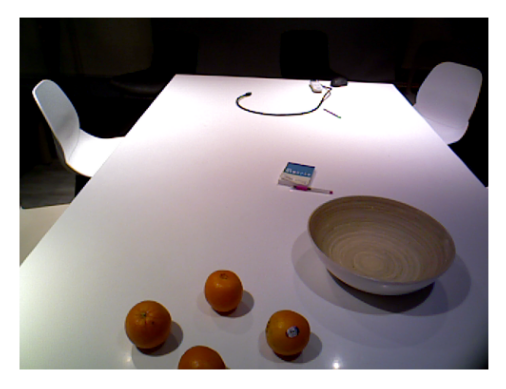

PlanResult(success=True,
 exception=None,
plan_raw="To complete the task, the robot needs to pick up the orange with a label (object 3) and place it inside the bowl (object 5). Here is the plan code to achieve this:\n\n```python\npick(obj=regions[3])\nplace(obj=regions[5], orientation='inside', offset=[0.5, 0.5])\n```",
 masks=<2 masks>,
 prompt='Task: Put the orange with a label in the bowl.',
 plan_code="\npick(obj=regions[0])\nplace(obj=regions[1], orientation='inside', offset=[0.5, 0.5])\n",
 annotated_image=<PIL.Image.Image image mode=RGB size=512x389 at 0x7F1F466AA1D0>,
 info_dict={'configs': {'label_mode': '1', 'alpha': 0.25, 'draw_mask': False, 'draw_mark': True, 'draw_box': True, 'mark_position': 'top_left'}, 'plan_raw_before_inspect': 'Plan:\n1. pick(orange_with_label)\n2. place(bowl, inside)\n\n```json\n[\n  {"name": "orange"},\n  {"name": "bowl"}\n]\n```'})
Annotated image: 


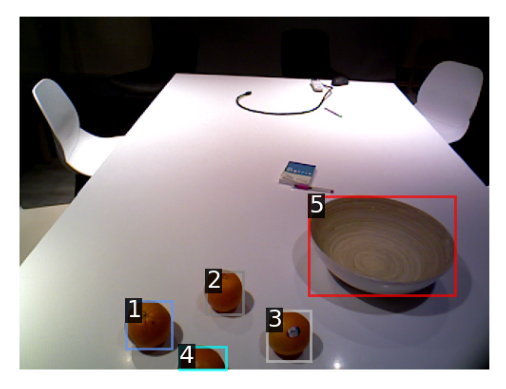

In [6]:
print("Input image:")
visualize_image(image)
plan_result = agent.try_plan(prompt, image)
print(plan_result)

if plan_result.success:
    print("Annotated image: ")
    visualize_image(plan_result.annotated_image)
    # Build a context containing the masks for the plan code to access
    masks = {"regions": [mask["segmentation"] for mask in plan_result.masks]}




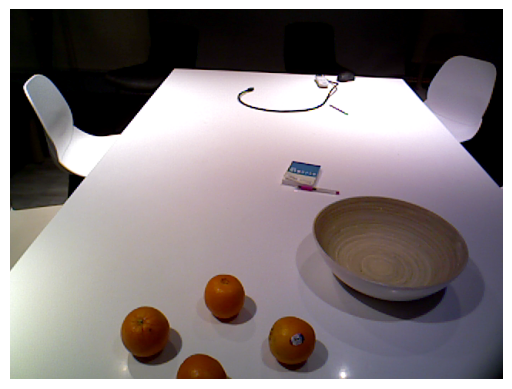
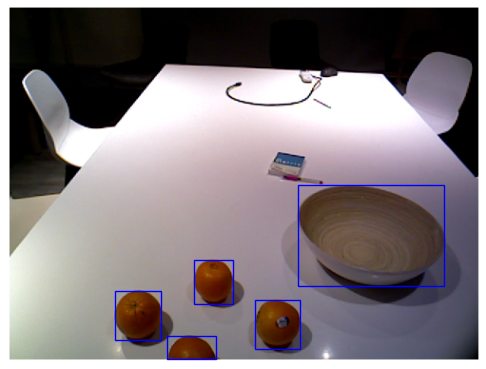
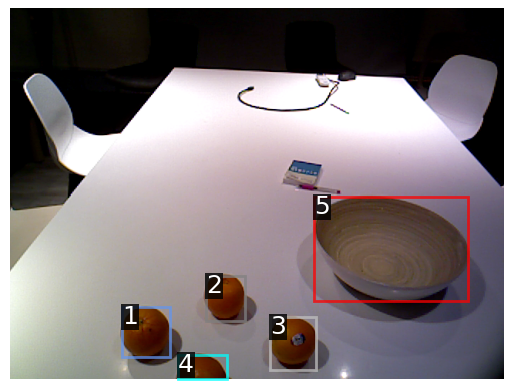
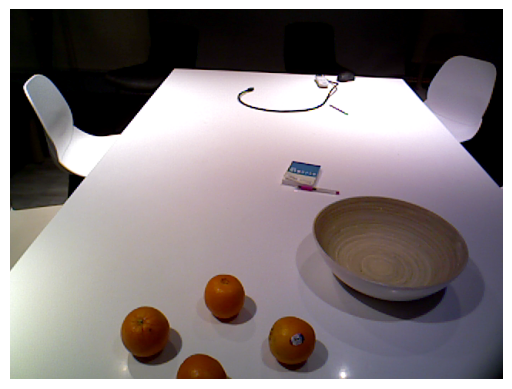

In [7]:
logging.get_logger().display_html_logs_in_notebook()

In [8]:
logger.save_logs_to_html_file("result.html")